<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/regression%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

Saving Tourism in Spain Large Dataset CSV.csv to Tourism in Spain Large Dataset CSV.csv


In [41]:
df = pd.read_csv('Tourism in Spain Large Dataset CSV.csv', encoding='ISO-8859-1')
df

,Year,Autonomous\nCommunity,International Leisure\n Tourists,Domestic \nTravels,International Leisure\n Tourists (Millions),Domestic\n Travels\n(Millions),International Tourists \n(all reasons),Ratio of International Tourists to Domestic Travels,Unemployment \nRate (%),GDP per\n Capita (),Annual Avg. Housing\n Price Index\n(Base 2015),Total Urban Waste Collected without RCD (Tonnes),Total Urban Waste Collected with RCD (Tonnes),"Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)",Unnamed: 14,Sources
0,2016,Andalusia,"9,007,656","31,761,512",9.01,31.76,"10,589,642",NaN,29.7,"17,865",102.841,"4,302,034","4,395,591",NaN,NaN,Industry Sector: https://www.caixabankresearch...
1,2016,Aragón,"364,836","8,011,707",0.36,8.01,"644,516",NaN,15.3,"26,243",101.896,"527,188","529,040",NaN,NaN,International Tourists: https://www.dataestur....
2,2016,Balearic Islands,"12,410,527","3,237,272",12.41,3.24,"12,997,549",NaN,18.4,"26,922",106.176,"840,387","846,128",NaN,NaN,Domestic Travels & Expenditure: https://www.in...
3,2016,Basque Country,"959,350","4,855,953",0.96,4.86,"1,382,083",NaN,12.8,"30,833",102.574,"966,673","987,223",NaN,NaN,Unemployment Rates: https://www.ine.es/jaxiT3/...
4,2016,Canary Islands,"12,956,111","5,712,319",12.96,5.71,"13,259,567",NaN,26.0,"19,450",103.344,"1,217,266","1,245,102",NaN,NaN,GDP per Capita: https://www.ine.es/dyngs/INEba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2024,Murcia Region,"801,947",NaN,0.80,NaN,"1,012,695",NaN,NaN,NaN,NaN,NaN,NaN,28.8,NaN,NaN
158,2024,Navarre AC,"330,861",NaN,0.33,NaN,"449,362",NaN,NaN,NaN,NaN,NaN,NaN,24.5,NaN,NaN
159,2024,Principality of Asturias,"197,539",NaN,0.20,NaN,"289,197",NaN,NaN,NaN,NaN,NaN,NaN,25.6,NaN,NaN
160,2024,Valencian AC,"8,974,890",NaN,8.97,NaN,"10,590,149",NaN,NaN,NaN,NaN,NaN,NaN,27.5,NaN,NaN


In [35]:
df.rename(
    columns={
        'International Tourists (all reasons)': 'International_Tourists_All',
        'Unemployment Rate (%)': 'Unemployment_Rate',
        'GDP per Capita (€)': 'GDP_per_Capita',
        'Annual Avg. Housing Price Index (Base 2015)': 'Annual_Avg_Housing_Price_Index',
        'Total Urban Waste Collected without RCD (Tonnes)': 'Total_Urban_Waste_Collected_without_RCD',
        'Total Urban Waste Collected with RCD (Tonnes)': 'Total_Urban_Waste_Collected_with_RCD',
    },
    inplace=True
)

In [42]:
df_filtered = df[
    (df['Year'] >= 2016) &
    (df['Year'] <= 2023)
].copy()

In [43]:
df_filtered

,Year,Autonomous\nCommunity,International Leisure\n Tourists,Domestic \nTravels,International Leisure\n Tourists (Millions),Domestic\n Travels\n(Millions),International Tourists \n(all reasons),Ratio of International Tourists to Domestic Travels,Unemployment \nRate (%),GDP per\n Capita (),Annual Avg. Housing\n Price Index\n(Base 2015),Total Urban Waste Collected without RCD (Tonnes),Total Urban Waste Collected with RCD (Tonnes),"Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)",Unnamed: 14,Sources
0,2016,Andalusia,"9,007,656","31,761,512",9.01,31.76,"10,589,642",NaN,29.7,"17,865",102.841,"4,302,034","4,395,591",NaN,NaN,Industry Sector: https://www.caixabankresearch...
1,2016,Aragón,"364,836","8,011,707",0.36,8.01,"644,516",NaN,15.3,"26,243",101.896,"527,188","529,040",NaN,NaN,International Tourists: https://www.dataestur....
2,2016,Balearic Islands,"12,410,527","3,237,272",12.41,3.24,"12,997,549",NaN,18.4,"26,922",106.176,"840,387","846,128",NaN,NaN,Domestic Travels & Expenditure: https://www.in...
3,2016,Basque Country,"959,350","4,855,953",0.96,4.86,"1,382,083",NaN,12.8,"30,833",102.574,"966,673","987,223",NaN,NaN,Unemployment Rates: https://www.ine.es/jaxiT3/...
4,2016,Canary Islands,"12,956,111","5,712,319",12.96,5.71,"13,259,567",NaN,26.0,"19,450",103.344,"1,217,266","1,245,102",NaN,NaN,GDP per Capita: https://www.ine.es/dyngs/INEba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2023,Murcia Region,"757,115","3,934,235",0.76,3.93,"993,442",NaN,13.5,"25,887",132.505,NaN,NaN,NaN,NaN,NaN
140,2023,Navarre AC,"256,011","2,227,033",0.26,2.23,"370,089",NaN,12.1,"37,088",132.566,NaN,NaN,NaN,NaN,NaN
141,2023,Principality of Asturias,"273,016","4,758,797",0.27,4.76,"383,908",NaN,13.1,"28,130",130.901,NaN,NaN,NaN,NaN,NaN
142,2023,Valencian AC,"8,900,242","18,477,734",8.90,18.48,"10,491,854",NaN,13.8,"26,453",135.921,NaN,NaN,NaN,NaN,NaN


In [44]:
print(df_filtered.columns.tolist())

['Year', 'Autonomous\nCommunity', 'International Leisure\n Tourists ', 'Domestic \nTravels ', 'International Leisure\n Tourists (Millions) ', 'Domestic\n Travels\n(Millions)', 'International Tourists \n(all reasons)', 'Ratio of International Tourists to Domestic Travels', 'Unemployment \nRate (%)', 'GDP per\n Capita (\x80)', 'Annual Avg. Housing\n Price Index\n(Base 2015)', 'Total Urban Waste Collected without RCD (Tonnes)', 'Total Urban Waste Collected with RCD (Tonnes)', 'Trade, Transportation, Hotels & Restaurants and Leisure Sector \nPercentage (%)', 'Unnamed: 14', 'Sources']


In [ ]:
# df_filtered = df_filtered[[
#         'Year',
#         'Autonomous Community',
#         'International_Tourists_All',
#         'International Leisure Tourists',
#         'Domestic Travels',
#         'Unemployment_Rate',
#         'GDP_per_Capita',
#         'Annual_Avg_Housing_Price_Index',
#         'Total_Urban_Waste_Collected_without_RCD',
#         'Total_Urban_Waste_Collected_with_RCD',
# ]].copy()

In [45]:
def create_regression_chart(data, x_col, y_col, title=None, xlabel=None, ylabel=None, save_path=None):
    """
    Creates a regression chart between two variables.

    Parameters:
    - data (DataFrame): The dataset containing the variables.
    - x_col (str): The name of the independent variable (X-axis).
    - y_col (str): The name of the dependent variable (Y-axis).
    - title (str, optional): Title of the chart.
    - xlabel (str, optional): Label for the X-axis.
    - ylabel (str, optional): Label for the Y-axis.
    - save_path (str, optional): Path to save the chart as an image (e.g., 'chart.png').
    """
    # Filter the data for the specified columns and drop missing values
    regression_data = data[[x_col, y_col]].dropna()

    # Create the regression plot
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=x_col,
        y=y_col,
        data=regression_data,
        scatter_kws={'alpha': 0.7},
        line_kws={'color': 'red'}
    )
    plt.title(title or f'Regression: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(xlabel or x_col, fontsize=12)
    plt.ylabel(ylabel or y_col, fontsize=12)
    plt.grid(True)

    # # Save the plot if a path is provided
    # if save_path:
    #     plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [ ]:
variable_pairs = [
    ('Domestic\n Travels\n(Millions)', 'International Leisure\n Tourists (Millions) '),
    ('Domestic\n Travels\n(Millions)', 'International Leisure\n Tourists (Millions) '),
    ('Domestic\n Travels\n(Millions)', 'International Leisure\n Tourists (Millions) '),
    ('Domestic\n Travels\n(Millions)', 'International Leisure\n Tourists (Millions) '),
    ('GDP_per_Capita', 'Unemployment_Rate'),
    ('Annual_Avg_Housing_Price_Index', 'International_Tourists_All'),

]

# Generate regression charts for all pairs
for x_var, y_var in variable_pairs:
    create_regression_chart(
        data=df_filtered,
        x_col=x_var,
        y_col=y_var,
        title=f'Regression: {x_var} vs {y_var}',
        xlabel=x_var,
        ylabel=y_var
    )

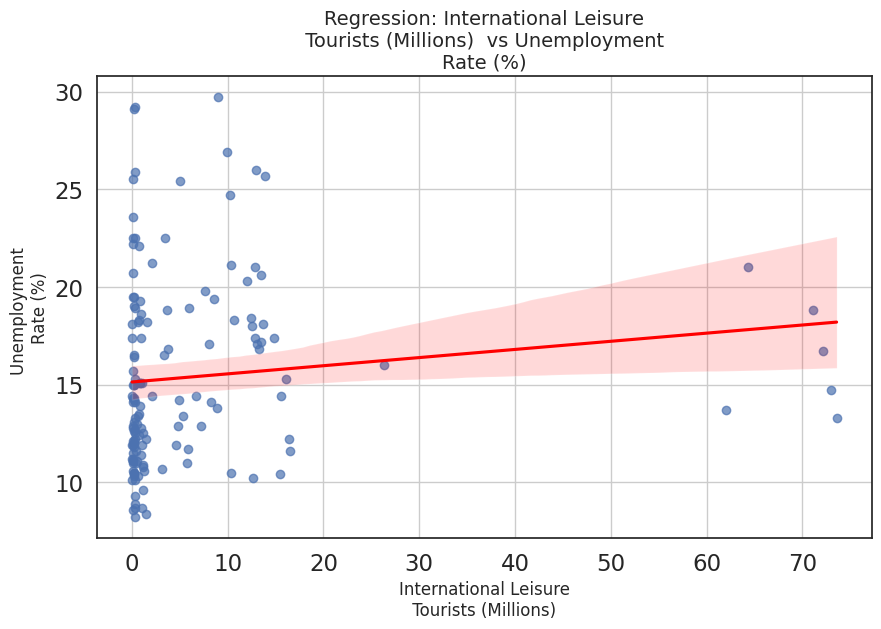

None


In [46]:
print(create_regression_chart(
        data=df_filtered,
        x_col="International Leisure\n Tourists (Millions) ",
        y_col="Unemployment \nRate (%)",
    )
)